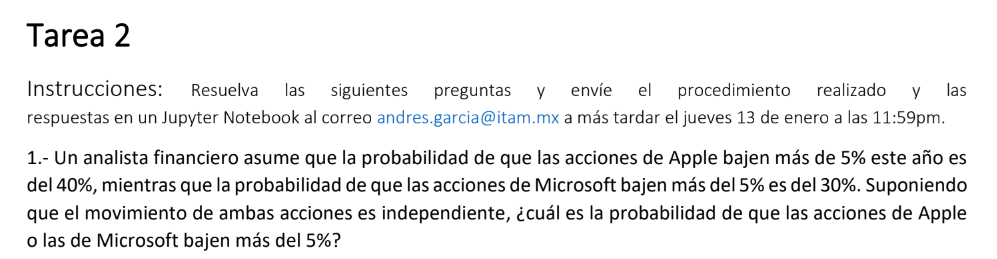

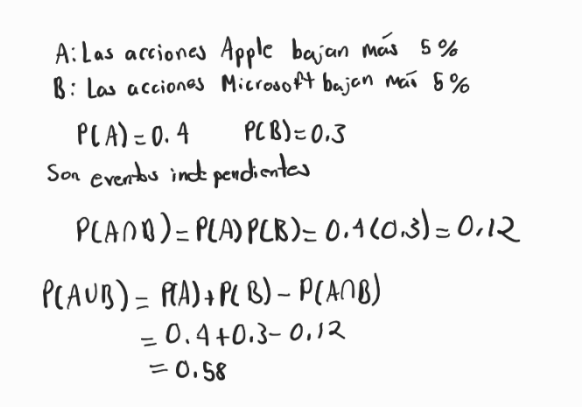

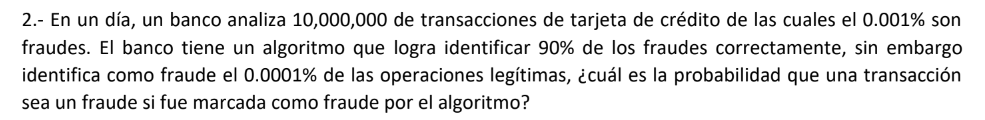

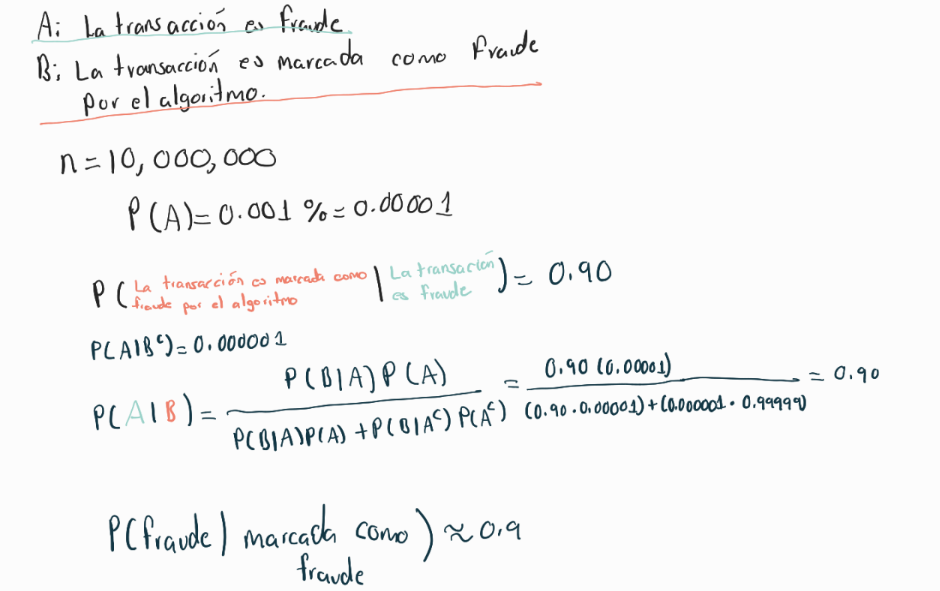

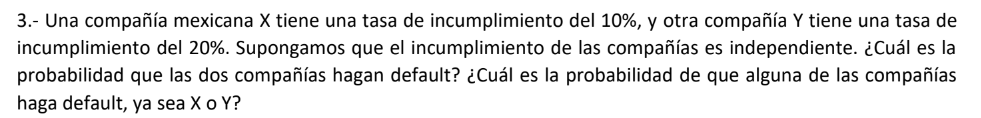

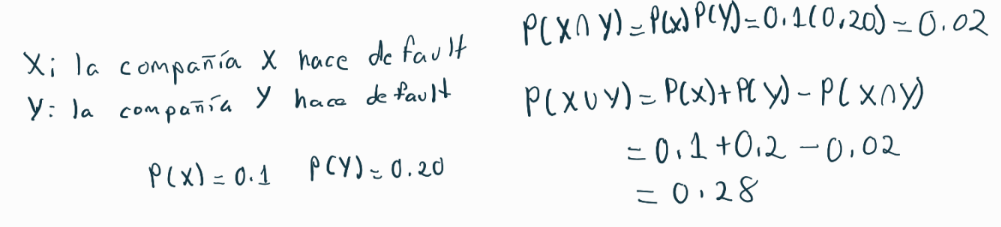

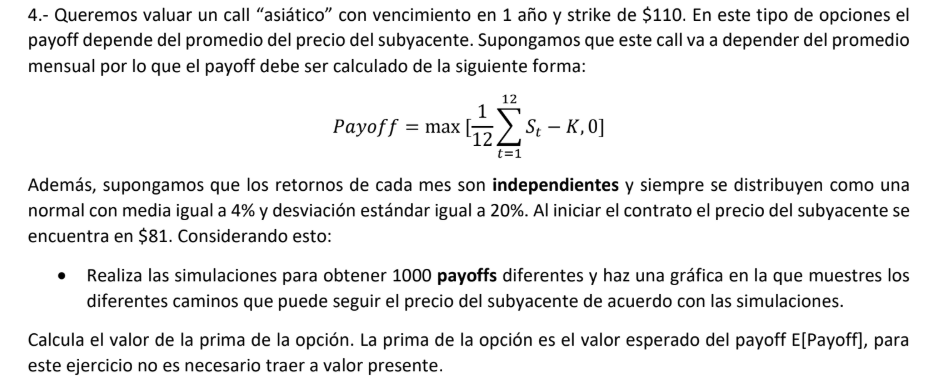

Notas

Derivado financiero: Es un instrumento cuyo valor depende (deriva) del precio o comportamiento de otro activo, llamado activo subyacente.
El payoff indica cuánto gana o pierde el tenedor del derivado una vez que se conoce el valor del subyacente.

-----------------------------------------------------

Call asiático -> Recibir un pago positivo si el promedio del subyacente durante la vida del contrato supera el precio de ejercicio K


St es el precio del activo en el periodo t
n es el número de observaciones (12 meses)
K es el strike

-----------------------------------------------------


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
S0 = 81
K = 110
mu = 0.04
sigma = 0.20
T = 12 #Un año
N = 1000 #simulaciones

np.random.seed(42)

# Simulación de retornos
returns = np.random.normal(mu, sigma, size=(N, T))

# Simulación de precios
prices = np.zeros((N, T))
prices[:, 0] = S0 * np.exp(returns[:, 0])

for t in range(1, T):
    prices[:, t] = prices[:, t-1] * np.exp(returns[:, t])

# Promedio mensual del precio
average_prices = prices.mean(axis=1)

# Payoffs
payoffs = np.maximum(average_prices - K, 0)

# Prima (valor esperado del payoff)
option_price = payoffs.mean()

option_price


np.float64(26.304000178979482)

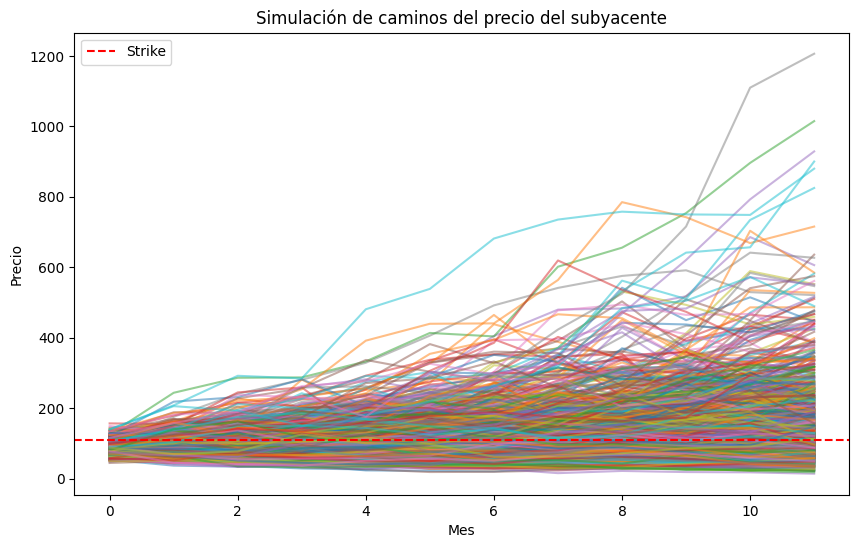

In [8]:
plt.figure(figsize=(10,6))

for i in range(1000):  # mostramos solo 100 para claridad
    plt.plot(prices[i], alpha=0.5)

plt.axhline(K, color='red', linestyle='--', label='Strike')
plt.title('Simulación de caminos del precio del subyacente')
plt.xlabel('Mes')
plt.ylabel('Precio')
plt.legend()
plt.show()


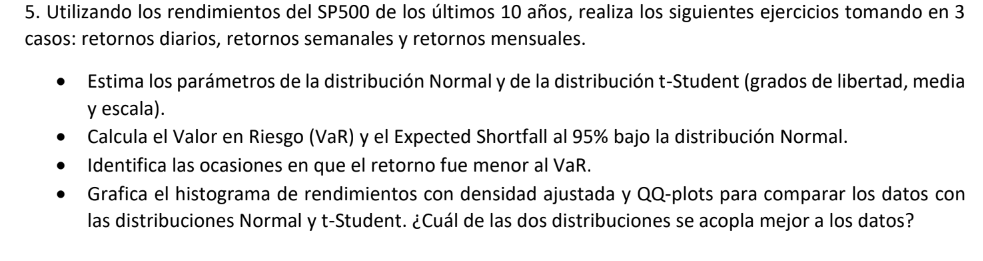

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [30]:
sp500 = yf.download("^GSPC", period="10y")["Close"] #Importamos el dataset del sp500
print(sp500)
ret_diario = sp500.pct_change().dropna() #Sacamos los rendimientos diarios quitando el na del principio
ret_semanal = sp500.resample("W").last().pct_change().dropna() #Sacamos los rendimientos semanales quitando el na del principio
ret_mensual = sp500.resample("ME").last().pct_change().dropna() #Sacamos los rendimientos mensual quitando el na del principio

[*********************100%***********************]  1 of 1 completed

Ticker            ^GSPC
Date                   
2016-01-11  1923.670044
2016-01-12  1938.680054
2016-01-13  1890.280029
2016-01-14  1921.839966
2016-01-15  1880.329956
...                 ...
2026-01-05  6902.049805
2026-01-06  6944.819824
2026-01-07  6920.930176
2026-01-08  6921.459961
2026-01-09  6966.279785

[2515 rows x 1 columns]


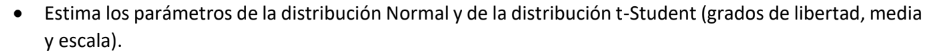

In [34]:
import scipy.stats as stats

def estimacion_parametros(retornos, nombre):
    mu, sigma = stats.norm.fit(retornos)
    nu, mu_t, sigma_t = stats.t.fit(retornos)

    print(f"\n{nombre}")
    print(f"Normal: mu = {mu:.6f}, sigma = {sigma:.6f}")
    print(f"t-Student: df = {nu:.2f}, mu = {mu_t:.6f}, sigma = {sigma_t:.6f}") #df = degrees of freedom

estimacion_parametros(ret_diario, "Diario")
estimacion_parametros(ret_semanal, "Semanal")
estimacion_parametros(ret_mensual, "Mensual")


Diario
Normal: mu = 0.000577, sigma = 0.011402
t-Student: df = 2.55, mu = 0.000966, sigma = 0.006251

Semanal
Normal: mu = 0.002797, sigma = 0.023565
t-Student: df = 3.32, mu = 0.003764, sigma = 0.015385

Mensual
Normal: mu = 0.011641, sigma = 0.043043
t-Student: df = 4.63, mu = 0.014947, sigma = 0.033756


In [36]:
def var_es_normal(retornos, nombre, alpha=0.05):
    mu, sigma = stats.norm.fit(retornos)
    z = stats.norm.ppf(alpha)

    VaR = mu + sigma * z
    ES = mu - sigma * stats.norm.pdf(z) / alpha

    print(f"\n{nombre}")
    print(f"VaR 95% = {VaR:.6f}")
    print(f"ES 95%  = {ES:.6f}")

var_es_normal(ret_diario, "Diario")
var_es_normal(ret_semanal, "Semanal")
var_es_normal(ret_mensual, "Mensual")



Diario
VaR 95% = -0.018177
ES 95%  = -0.022941

Semanal
VaR 95% = -0.035964
ES 95%  = -0.045811

Mensual
VaR 95% = -0.059159
ES 95%  = -0.077145


In [39]:
def violaciones_var(retornos, nombre, alpha=0.05):
    mu, sigma = stats.norm.fit(retornos)
    VaR = mu + sigma * stats.norm.ppf(alpha)

    violaciones = retornos[retornos < VaR]
    porcentaje = len(violaciones) / len(retornos)

    print(f"\n{nombre}")
    print(f"Violaciones: {len(violaciones)}")
    print(f"Porcentaje: {porcentaje:.2%}")

violaciones_var(ret_diario, "Diario")
violaciones_var(ret_semanal, "Semanal")
violaciones_var(ret_mensual, "Mensual")



Diario
Violaciones: 2514
Porcentaje: 100.00%

Semanal
Violaciones: 521
Porcentaje: 100.00%

Mensual
Violaciones: 120
Porcentaje: 100.00%


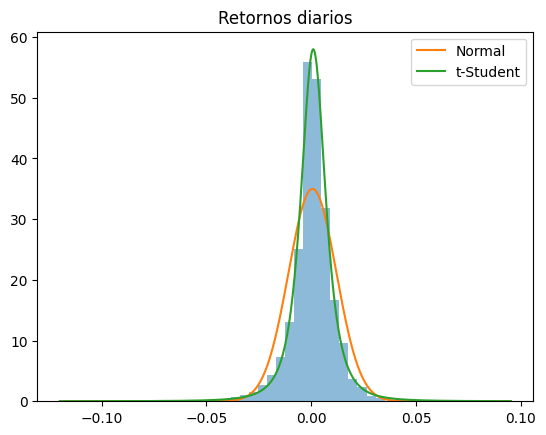

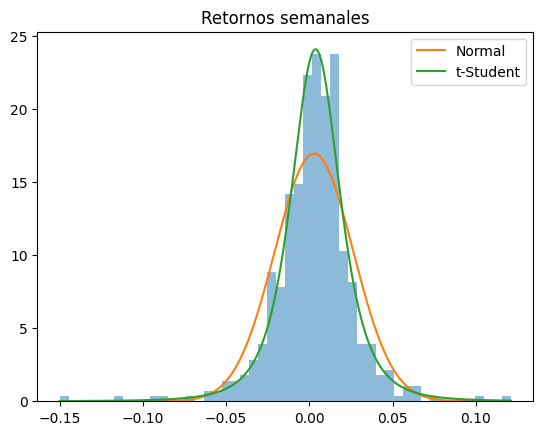

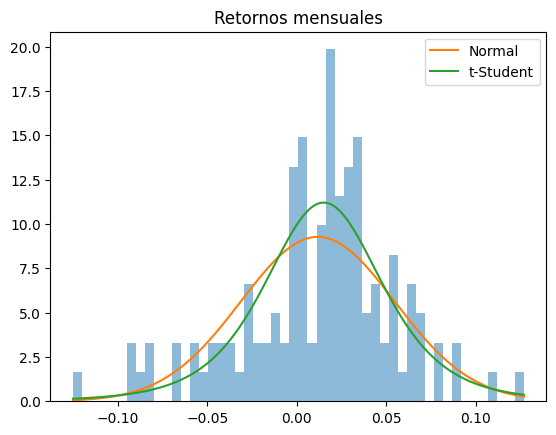

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def histograma(retornos, nombre):
    mu, sigma = stats.norm.fit(retornos)
    nu, mu_t, sigma_t = stats.t.fit(retornos)

    x = np.linspace(retornos.min(), retornos.max(), 1000)

    plt.hist(retornos, bins=50, density=True, alpha=0.5)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label="Normal")
    plt.plot(x, stats.t.pdf(x, nu, mu_t, sigma_t), label="t-Student")
    plt.title(nombre)
    plt.legend()
    plt.show()

histograma(ret_diario, "Retornos diarios")
histograma(ret_semanal, "Retornos semanales")
histograma(ret_mensual, "Retornos mensuales")


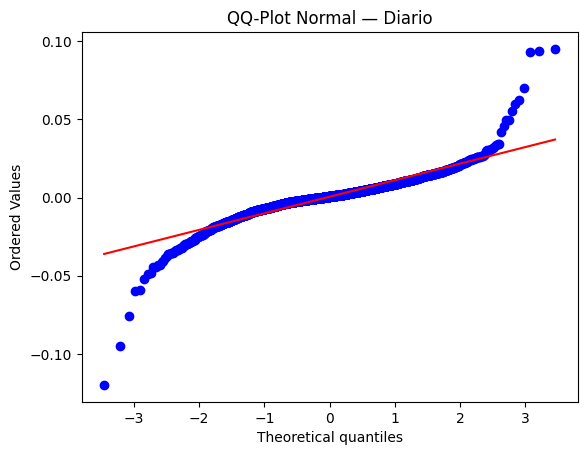

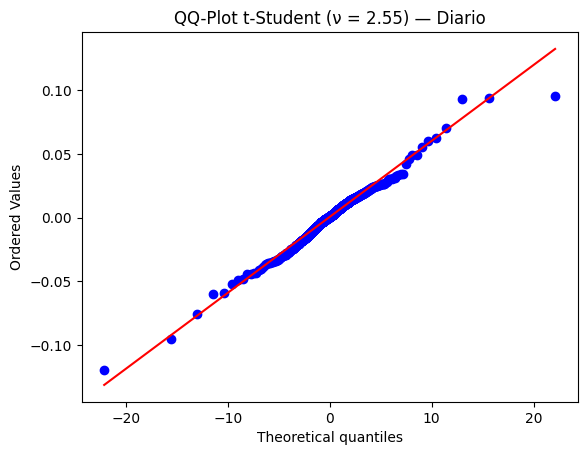

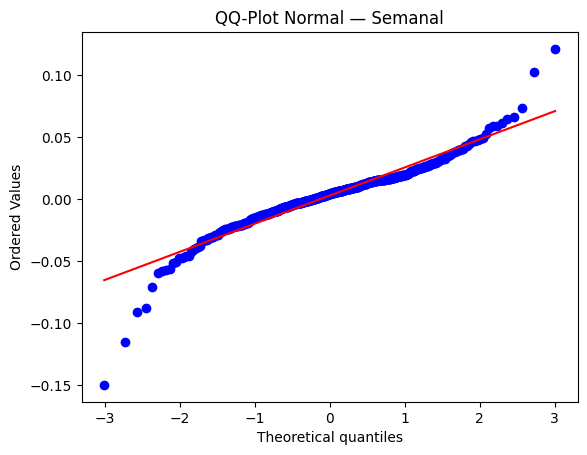

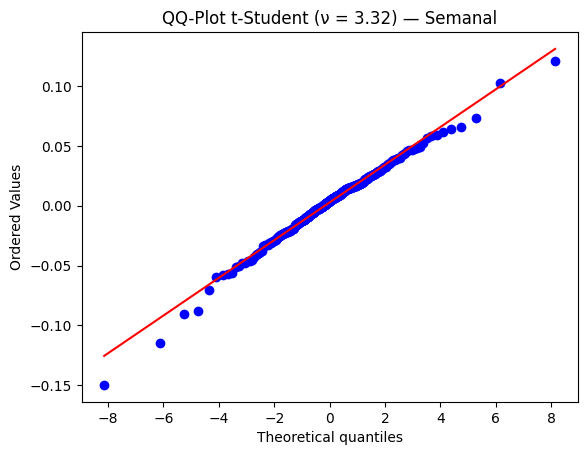

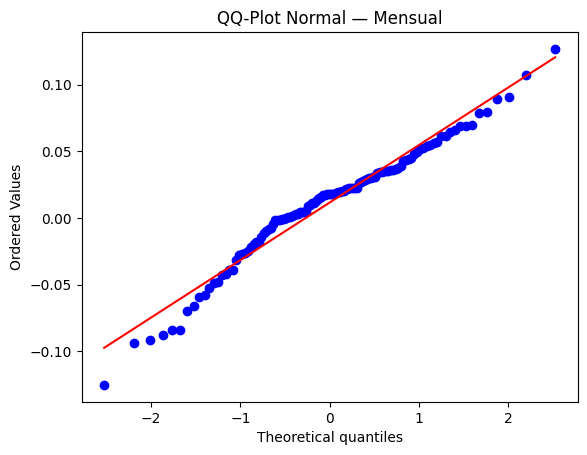

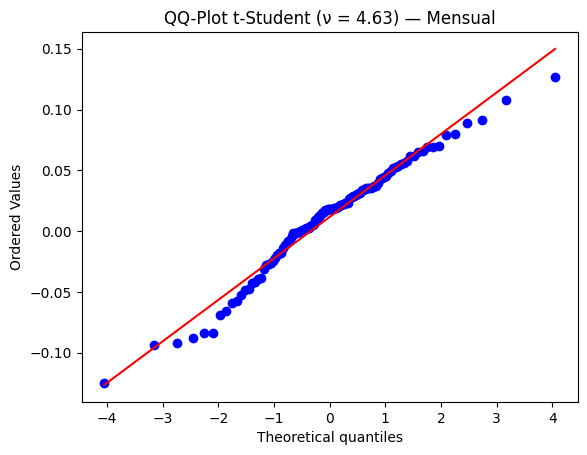

In [25]:
def qq_plots(retornos, nombre):
    # convertir a array 1D
    retornos = np.asarray(retornos).ravel()
    retornos = retornos[~np.isnan(retornos)]

    # QQ-Plot Normal
    stats.probplot(retornos, dist="norm", plot=plt)
    plt.title(f"QQ-Plot Normal — {nombre}")
    plt.show()

    # Ajuste t-Student
    nu, loc, scale = stats.t.fit(retornos)

    stats.probplot(retornos, dist=stats.t(df=nu), plot=plt)
    plt.title(f"QQ-Plot t-Student (ν = {nu:.2f}) — {nombre}")
    plt.show()

qq_plots(ret_diario, "Diario")
qq_plots(ret_semanal, "Semanal")
qq_plots(ret_mensual, "Mensual")
